In [12]:
# Function to plot SVM decision boundary and margin

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs,make_circles

plt.style.use('ggplot')
def plot_svm(X,y,clf,title=''):
    plt.figure(figsize=(10,7))

    # plot the decision function
    ax = plt.gca()
    xlim = [np.min(X[:,0])-0.5,np.max(X[:,0])+0.5]
    ylim = [np.min(X[:,1])-0.5,np.max(X[:,1])+0.5]

    #plt.xlim = xlim
    #plt.ylim= ylim
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contourf(XX, YY, Z, colors=['cyan','lightblue','pink','salmon'], levels=[-1e10,-1, 0, 1,1e10], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.contour(XX, YY, Z,levels=[-1e10,-1, 0, 1,1e10], colors=['b','k','k','k','b'], alpha=0.7,
               linestyles=['-','--', '-', '--','-'],linewidths=[0,1,4,1,0])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], edgecolor='gold',alpha=1,
              c='g',linewidth=15)
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],c='b',marker='*',s=200)
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],c='r',marker='P',s=200)
    plt.title(title,fontsize=20)
    
    plt.show()

# Linearly separable data

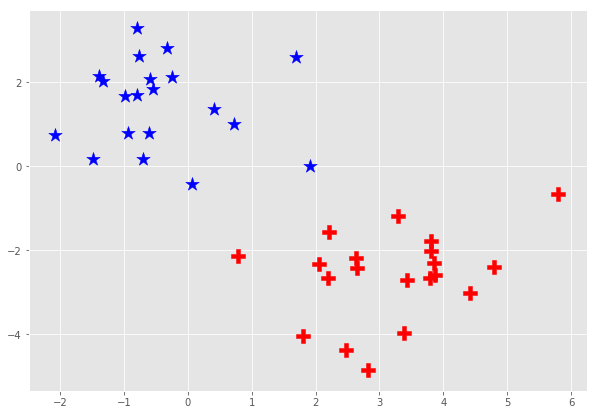

In [15]:
# Generate linearly separable data

X, y = make_blobs(n_samples=40, centers=2)

plt.figure(figsize=(10,7))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1],c='b',marker='*',s=200)
plt.scatter(X[y==1][:, 0], X[y==1][:, 1],c='r',marker='P',s=200)
plt.show()

## Influence of the parameter C

As we increase $C$, the margin gets wider but more points lie inside the margin 

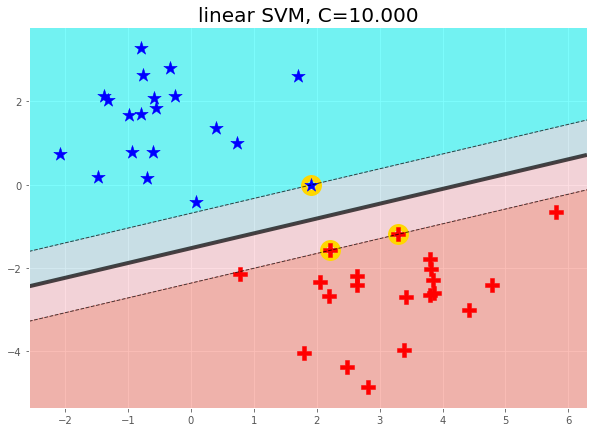

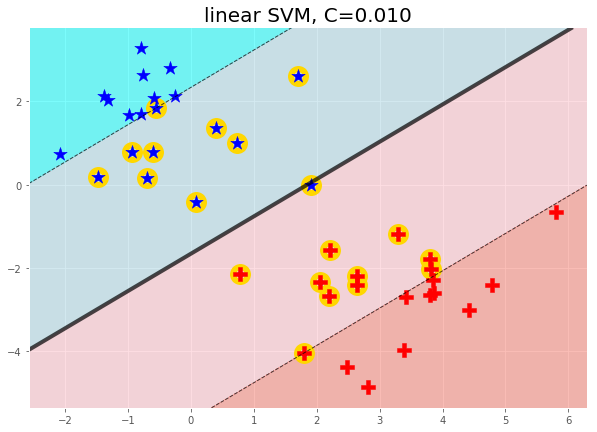

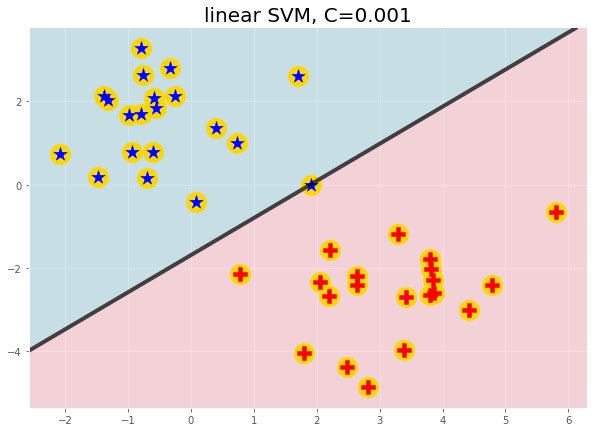

In [16]:

for C in [10,1e-2,1e-3]:
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X, y)
    plot_svm(X,y,clf,title='linear SVM, C=%.3f'%C)
    

# Non linearly separable data (non-linear structure)

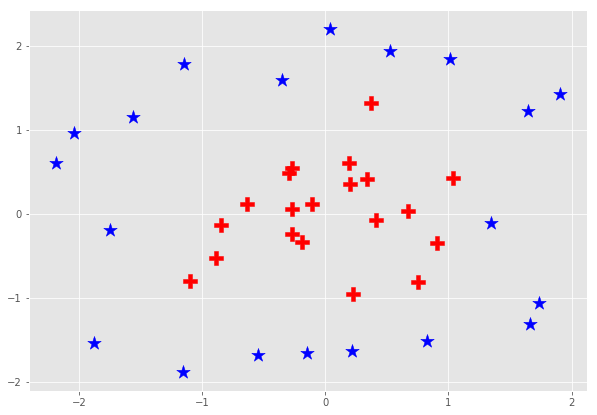

In [35]:
# Generate non-linearly seprable data

X, y = make_circles(n_samples=40,noise=0.15,factor=0.3)
X = X*2

plt.figure(figsize=(10,7))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1],c='b',marker='*',s=200)
plt.scatter(X[y==1][:, 0], X[y==1][:, 1],c='r',marker='P',s=200)
plt.show()

## Poylnomial kernel - effect of the degree

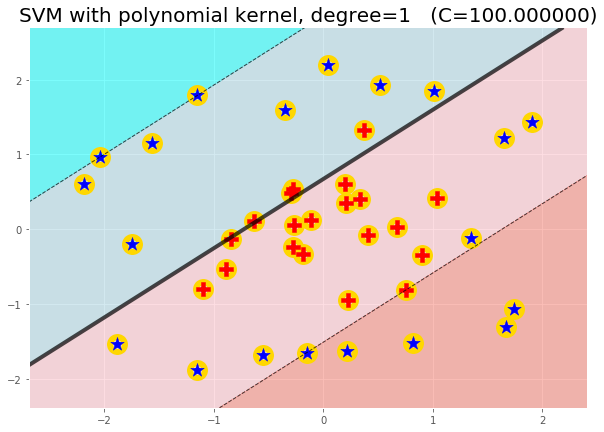

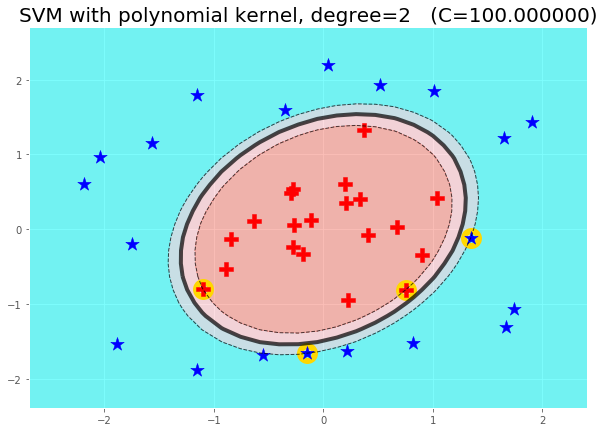

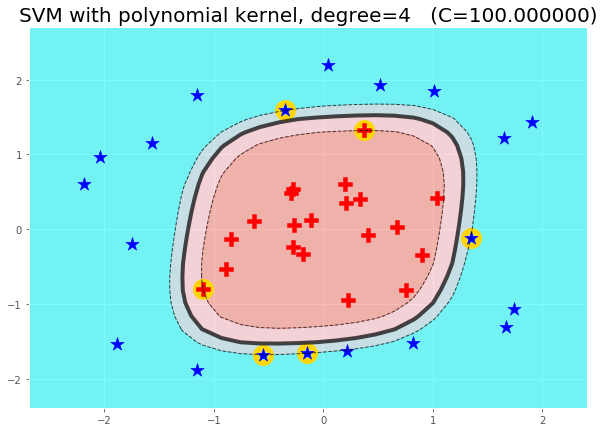

In [36]:


for d in [1,2,4]:
    C = 100
    clf = svm.SVC(kernel='poly', C=C,degree=d)
    clf.fit(X, y)
    plot_svm(X,y,clf,title='SVM with polynomial kernel, degree=%i   (C=%f)'%(d,C))
    

## RBF kernel - effect of $\sigma$ parameter

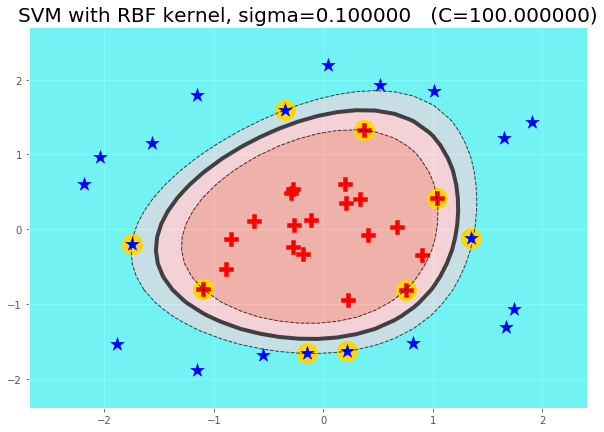

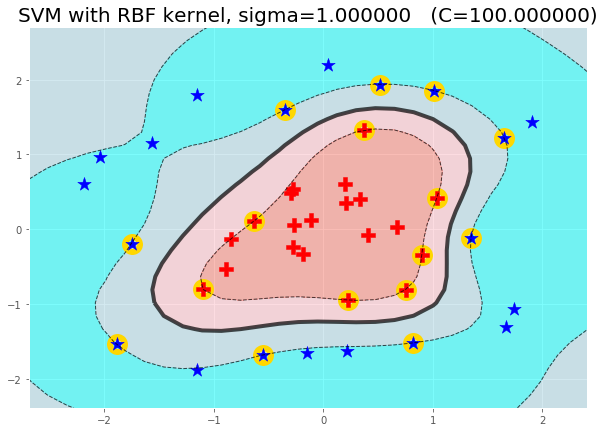

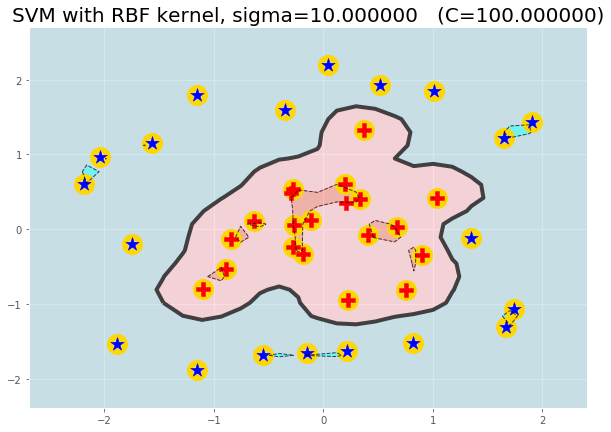

In [39]:

for s in [0.1,1,10]:
    C = 100
    clf = svm.SVC(kernel='rbf', C=C,gamma=s)
    clf.fit(X, y)
    plot_svm(X,y,clf,title='SVM with RBF kernel, sigma=%f   (C=%f)'%(s,C))



# Non linearly separable data (linear structure and large noise)
Here we look at the interplay between the parameter $C$ of the SVM and the parameter $\sigma$ of the RBF kernel on the bias-variance tradeoff...

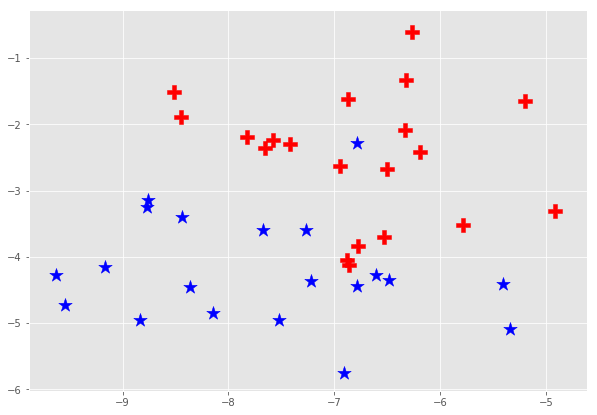

In [43]:

X, y = make_blobs(n_samples=40, centers=2)

plt.figure(figsize=(10,7))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1],c='b',marker='*',s=200)
plt.scatter(X[y==1][:, 0], X[y==1][:, 1],c='r',marker='P',s=200)
plt.show()

## Varying $\sigma$ while keeping $C$ fixed

As $\sigma$ increases the margin gets wider at the price of an increase in the complexity of the decision boundary.

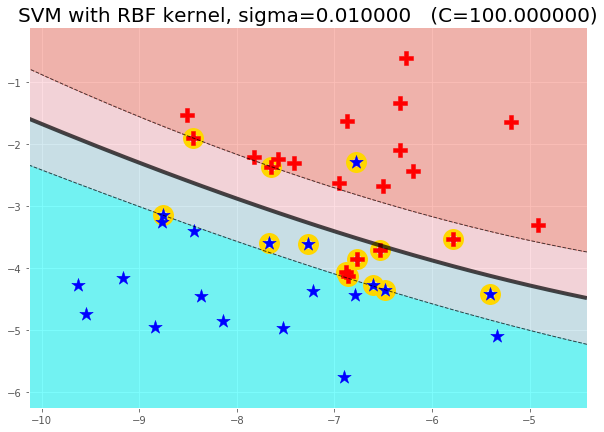

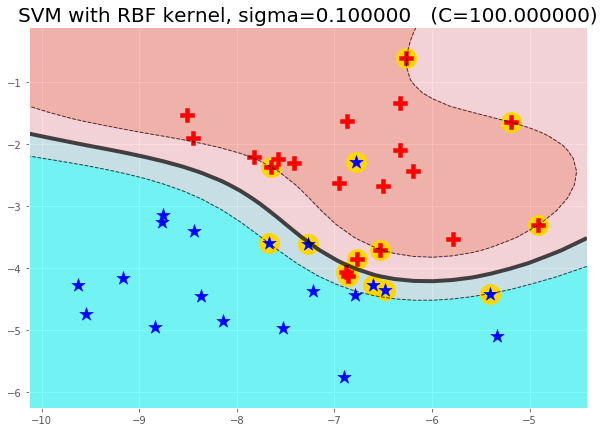

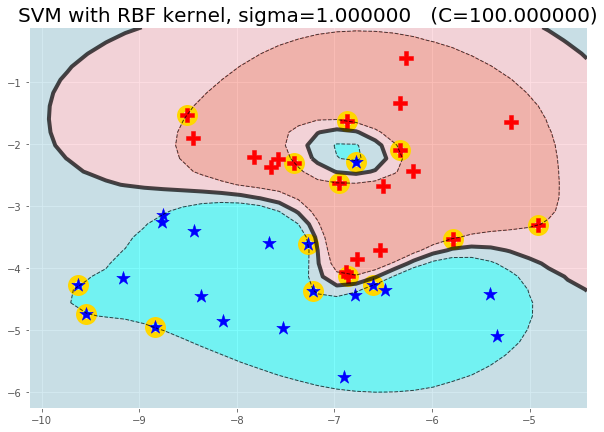

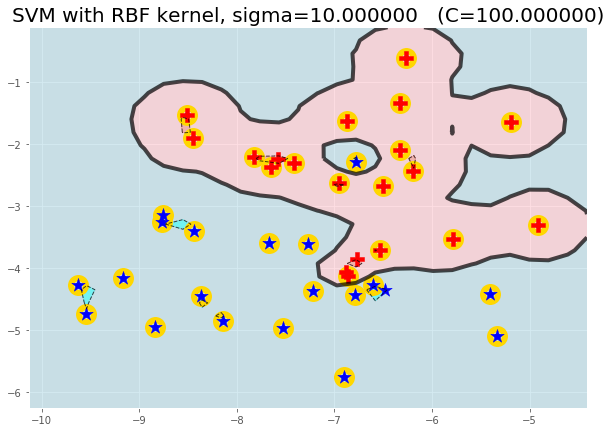

In [45]:

for s in [0.01,0.1,1,10]:
    C = 100
    clf = svm.SVC(kernel='rbf', C=C,gamma=s)
    clf.fit(X, y)
    plot_svm(X,y,clf,title='SVM with RBF kernel, sigma=%f   (C=%f)'%(s,C))


## Varying $C$ while keeping $\sigma$ fixed
As $C$ increases, the margin gets smaller and the decision boundary gets bended to avoid having training instances inside the margins. Note though that the decision boundary remains somehow simple and smooth compared to the previous case where $\sigma$ was increasing).

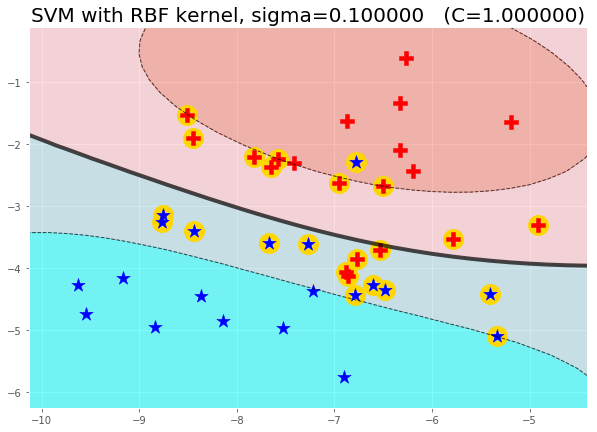

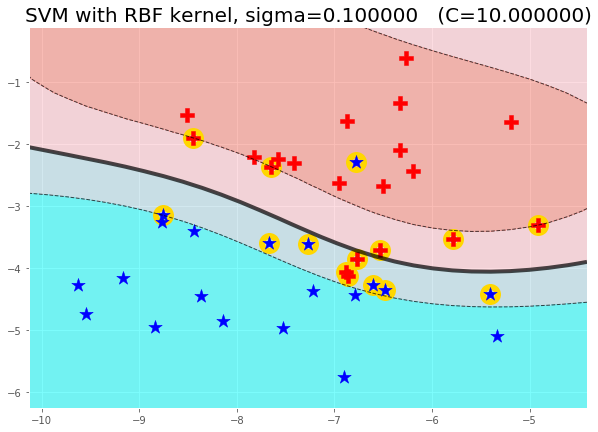

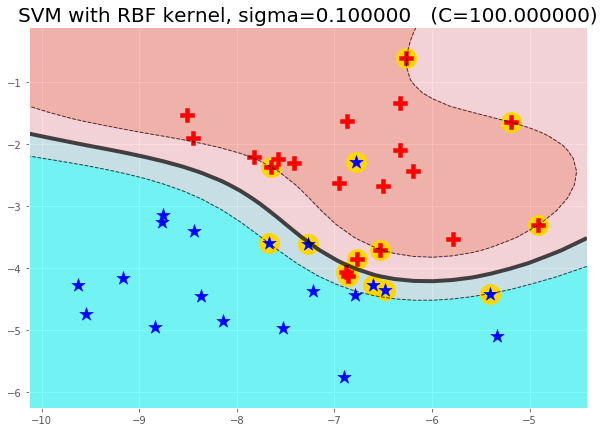

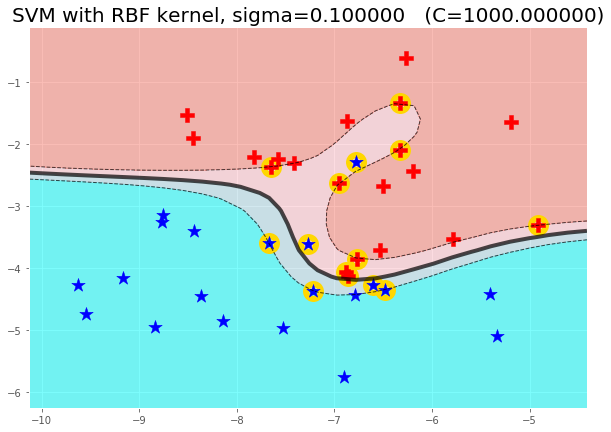

In [49]:

for C in [1,10,100,1000]:
    s = 0.1
    clf = svm.SVC(kernel='rbf', C=C,gamma=s)
    clf.fit(X, y)
    plot_svm(X,y,clf,title='SVM with RBF kernel, sigma=%f   (C=%f)'%(s,C))
